https://networkx.github.io/documentation/networkx-1.10/tutorial/tutorial.html               
https://www.python-course.eu/graphs_python.php          
https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/        
https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/         
https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.animation as animation 
import math
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
class Graph(object):
    
    def __init__(self, graph=None, pos=None, weighted=True):
        if graph is None:
            self.graph = {}
        else:
            self.graph = graph
        self.weighted = weighted
        self.pos = pos
    
    def nodes(self):
        return (list(self.graph.keys()))
    
    def edges(self):
        return (self.generate_edges())
    
    def neighbors(self, node):
        edges = self.generate_edges()
        neighbors = [edge[1] for edge in edges if edge[0] == node]

        return neighbors
    
    def get_edges(self, node):
        edges = self.generate_edges()
        self_edges = [edge for edge in edges if edge[0] == node]
        
        return self_edges
    
    def add_node(self, node):
        if self.weighted is True:
            self.graph[node] = [(None,None)]
        else:
            self.graph[node] = []
       
    def add_edges(self, node, edge, weight=None):
        if self.weighted is True:
            if edge not in self.graph[node]:
                self.graph[node].append((edge,weight))
        else:
            if edge not in self.graph[node]:
                self.graph[node].append(edge)
            
    def generate_edges(self):
        edges = []
        
        if self.weighted is True:
            for node in self.graph.keys():
                for neighbor,weight in self.graph[node]:
                    if (neighbor,weight) != (None,None):
                        edges.append((node, neighbor, weight))
        else:
            for node in self.graph.keys():
                for neighbor in self.graph[node]:
                    edges.append((node, neighbor))
        
        return edges

    ##------------- Depth First Search (DFS) -------------######
    
    def dfs(self, start, goal):

        visited, queue, extensions = [],[],[]
        
        solution = self.traverse_dfs(start, goal, visited, queue, extensions)
        
        if solution == -1:
            print('No Solution')
        else:
            return solution

    def traverse_dfs(self, node, goal, visited, queue, extensions):

        visited.append(node)
        paths = sorted(self.get_edges(node))  # sort because DFS choses next path lexically  

        for path in list(reversed(paths)):    # add paths to queue in reverse so first one gets popped out first
            if path not in extensions and (path[1],path[0],path[2]) not in extensions: queue.insert(0,path)
        if len(queue) == 0: return -1

        for path in queue:    # update next node if it has not been visited before
            next_path = queue.pop(0)
            node = next_path[1]
            extensions.append(next_path)

            if node == goal: 
                visited.append(node)
                return [visited, extensions]  # check for goal condition. Exit if complete
            if node not in visited: break

        if len(visited) >= 3*len(self.graph): return -1   # if all nodes have been visited already, get out as there is prolly no solution

        return self.traverse_dfs(node, goal, visited, queue, extensions)
    
    ##------------- Breadth First Search (BFS) -------------######

    def bfs(self, start, goal):

        visited, queue, extensions = [],[],[]
        
        solution = self.traverse_bfs(start, goal, visited, queue, extensions)
        
        if solution == -1:
            print('No Solution')
        else:
            return solution
        
    def traverse_bfs(self, node, goal, visited, queue, extensions):

        visited.append(node)
        paths = sorted(self.get_edges(node))  # sort because BFS choses next path lexically  

        for path in paths:    # add paths to queue in reverse so first one gets popped out first
            queue.append(path)

        if len(queue) == 0: return -1

        next_path = queue.pop(0)
        node = next_path[1]
        extensions.append(next_path)

        if node == goal: 
            visited.append(node)
            return [visited, extensions]  # check for goal condition. Exit if complete    

        if len(visited) >= 3*len(self.graph): return -1   # if all nodes have been visited already, get out as there is prolly no solution

        return self.traverse_bfs(node, goal, visited, queue, extensions)
    
    ##------------- Hill Climbing -------------######

    def hill_climb(self, start, goal):

        visited, queue, extensions = [],[],[]
        
        solution = self.traverse_hill_climb(start, goal, visited, queue, extensions)
        
        if solution == -1:
            print('No Solution')
        else:
            return solution

    def traverse_hill_climb(self, node, goal, visited, queue, extensions):

        visited.append(node)
        paths = sorted(self.get_edges(node))  # sort because DFS choses next path lexically  

        for path in list(reversed(paths)):    # add paths to queue in reverse so first one gets popped out first
            if path not in extensions and (path[1],path[0],path[2]) not in extensions: queue.insert(0,path)
        
        if len(queue) == 0: return -1

        queue = self.sort_heuristically(queue, goal)
        
        next_path = queue.pop(0)
        node = next_path[1]
        extensions.append(next_path)

        if node == goal: 
            visited.append(node)
            return [visited, extensions]  # check for goal condition. Exit if complete
        
        if len(visited) >= 3*len(self.graph): return -1   # if all nodes have been visited already, get out as there is prolly no solution

        return self.traverse_hill_climb(node, goal, visited, queue, extensions)
    
    ##------------- Branch and Bound -------------######

    def branch_bound(self, start, goal):

        visited, queue, extensions = [],[],[]
        distance = 0
        
        solution = self.traverse_branch_bound(start, goal, visited, queue, extensions, distance)
        
        if solution == -1:
            print('No Solution')
        else:
            return solution
        
    def traverse_branch_bound(self, node, goal, visited, queue, extensions, distance):

        visited.append(node)
        paths = sorted(self.get_edges(node))  # sort because DFS choses next path lexically  

        for path in paths:    # add paths to queue in reverse so first one gets popped out first
            queue.append((path[0],path[1],path[2]+distance))

        if len(queue) == 0: return -1
        queue = sorted(queue, key=lambda x:x[2])
        
        next_path = queue.pop(0)
        node = next_path[1]
        extensions.append(next_path)
        distance = next_path[2]
        
        if node == goal: 
            visited.append(node)
            return [visited, extensions]  # check for goal condition. Exit if complete
        
        if len(visited) >= 3*len(self.graph): return -1   # if all nodes have been visited already, get out as there is prolly no solution

        return self.traverse_branch_bound(node, goal, visited, queue, extensions,distance)
    
        ##------------- Branch and Bound + Ext. List-------------######

    def branch_bound_extended(self, start, goal):

        visited, queue, extensions = [],[],[]
        distance = 0
        
        solution = self.traverse_branch_bound_extended(start, goal, visited, queue, extensions, distance)
        
        if solution == -1:
            print('No Solution')
        else:
            return solution
        
    def traverse_branch_bound_extended(self, node, goal, visited, queue, extensions, distance):

        visited.append(node)
        paths = sorted(self.get_edges(node))  # sort because DFS choses next path lexically  

        for path in paths:    # add paths to queue in reverse so first one gets popped out first
            queue.append((path[0],path[1],path[2]+distance))
        
        for path in queue:
            for extension in extensions:
                if (path[0],path[1]) == extension[:2] or (path[1],path[0]) == extension[:2]:
                    queue.remove(path)

        if len(queue) == 0: return -1

        queue = sorted(queue, key=lambda x:x[2])
        
        next_path = queue.pop(0)
        node = next_path[1]
        extensions.append(next_path)
        distance = next_path[2]
        
        if node == goal: 
            visited.append(node)
            return [visited, extensions]  # check for goal condition. Exit if complete
        
        if len(visited) >= 3*len(self.graph): return -1   # if all nodes have been visited already, get out as there is prolly no solution

        return self.traverse_branch_bound_extended(node, goal, visited, queue, extensions,distance)
    
    ##------------- A* -------------######

    def A(self, start, goal):

        visited, queue, extensions = [],[],[]
        distance = 0
        
        solution = self.traverse_A(start, goal, visited, queue, extensions, distance)
        
        if solution == -1:
            print('No Solution')
        else:
            return solution

    def traverse_A(self, node, goal, visited, queue, extensions, distance):

        visited.append(node)
        paths = sorted(self.get_edges(node))  # sort because DFS choses next path lexically  

        
        
        for path in paths:    # add paths to queue in reverse so first one gets popped out first
            queue.append((path[0],path[1],path[2]+self.heuristic_distance_to_target(path[1],goal)))
            
        for path in queue:
            for extension in extensions:
                if (path[0],path[1]) == extension[:2] or (path[1],path[0]) == extension[:2]:
                    queue.remove(path)

        if len(queue) == 0: return -1
        
        queue = sorted(queue,key=lambda x: x[2])

        next_path = queue.pop(0)
        node = next_path[1]
        extensions.append(next_path)
        distance = next_path[2]
        
        if node == goal: 
            visited.append(node)
            return [visited, extensions]  # check for goal condition. Exit if complete
        
        if len(visited) >= 3*len(self.graph): return -1   # if all nodes have been visited already, get out as there is prolly no solution

        return self.traverse_A(node, goal, visited, queue, extensions,distance)
    
    def distance_from_root(self, source,target):
        return nx.shortest_path(self.graph, source=source, target=target, weight='weight')

    def heuristic_distance_to_target(self, source, target):

        pos1 = self.pos[source]
        pos2 = self.pos[target]    

        x = pos2[0]-pos1[0]
        y = pos2[1]-pos1[1]

        return math.hypot(x, y) 
    
    def sort_heuristically(self, queue, target):
        updated_queue = [(edge[0],edge[1],self.heuristic_distance_to_target(edge[1],target)) for edge in queue]
        sorted_queue = [y for x,y in sorted( zip(updated_queue, queue), key=lambda x: x[0][2])]

        return sorted_queue

## Visualize

In [3]:
def init():
    line.set_data([], [])
    return line,

def animate(i):
    extension = extensions[i]
    p1,p2 = pos[extension[0]],pos[extension[1]]
    
    x = [p1[0],p2[0]]
    y = [p1[1],p2[1]]
    line.set_data(x, y)
    line.set_color('r')
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]],c='r')
    return line,

In [4]:
def label(extensions, pos, legend = False):
    plotted = []
    alpha = 0.2
    
    for i,extension in enumerate(extensions):
        
        p1,p2 = pos[extension[0]],pos[extension[1]]
        label = str(i) + ' '+ str(extension[0])+ ' - '+ str(extension[1])
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]],label=label)
        x = (p1[0]+p2[0])/2
        y = (p1[1]+p2[1])/2
        
        if [x,y] in plotted:
            alpha *= -1
            plt.text(alpha+x,alpha+y-0.1,str(i+1))
        else:
            plt.text(x,alpha+y-0.1,str(i+1))
            
        plotted += [[x,y]]
        
    if legend is True: plt.legend()

## Graphs

In [5]:
g1 = {'S': [('A',3), ('B',5)],
     'A': [('B',4), ('S',3), ('D',3)],
     'B': [('A',4), ('C',4), ('S',5)],
     'C': [('B',4), ('E',6)],
     'D': [('A',3), ('G',5)],
     'E': [('C',6)],
     'G': [('D',5)]}
pos1 = {'S':(0,0),
       'A':(3,0),
       'B':(3,4),
       'C':(3,8),
       'D':(6,0),
       'E':(9,8),
       'G':(9,4)}
# nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k')

In [6]:
c = np.sqrt(18)
g2 = {'S': [('A',c), ('B',c)],
     'A': [('C',c), ('S',c)],
     'B': [('C',c), ('S',c)],
     'C': [('A',c), ('B',c), ('G',3)],
     'G': [('C',3)]}
pos2 = {'S':(0,3),
        'A':(3,0),
        'B':(3,6),
        'C':(6,3),
        'G':(9,3)}

# nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k')

In [7]:
g3 = {'S': [('A',6), ('B',8), ('E',5)],
     'A': [('C',c), ('D',5), ('E',5), ('S',6)],
     'B': [('C',6), ('E',5), ('S',8)],
     'C': [('A',8), ('B',6), ('D',5), ('E',5)],
     'D': [('A',5), ('C',5), ('G',3)],
     'E': [('A',5), ('B',5), ('C',5), ('S',5)],
     'G': [('D',3)]}
pos3 = {'S':(0,0),
       'A':(6,0),
       'B':(0,8),
       'C':(6,8),
       'D':(9,4),
       'E':(3,4),
       'G':(12,4)}
# nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k')

In [8]:
c = np.sqrt(18)
g4 = {'S': [('A',3), ('B',3)],
     'A': [('C',c), ('D',c), ('S',3)],
     'B': [('C',c), ('D',c), ('S',3)],
     'C': [('A',c), ('B',c), ('G',3)],
     'D': [('A',c), ('B',c)],
     'G': [('C',3)]}

pos4 = {'S':(3,3),
        'A':(3,0),
        'B':(3,6),
        'C':(6,3),
        'D':(0,3),
        'G':(9,3)}
# nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k')

In [9]:
c = np.sqrt(18)
g5 = {'S': [('A',100), ('B',3)],
     'A': [('C',1), ('D',c), ('S',100)],
     'B': [('C',c), ('D',c), ('S',3)],
     'C': [('A',1), ('B',c), ('G',3)],
     'D': [('A',c), ('B',c)],
     'G': [('C',3)]}

pos5 = {'S':(3,3),
        'A':(3,0),
        'B':(3,6),
        'C':(6,3),
        'D':(0,3),
        'G':(9,3)}
# nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k')

# Weighted Graph

In [10]:
g = g1
pos = pos1

In [11]:
!conda install pygraphviz -y

Solving environment: done

# All requested packages already installed.



In [12]:
import pygraphviz

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


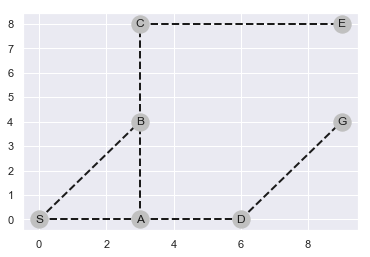

In [13]:
graph = Graph(graph=g, pos=pos)
G = nx.Graph()
G.add_nodes_from(graph.nodes())
G.add_weighted_edges_from(graph.edges())

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G,pos,edge_labels=labels,node_color='silver',style='dashed',edge_color='k',width=2)

# Depth-First Search (DFS)

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


number of extensions: 7
extensions: [('S', 'A'), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'S'), ('C', 'E'), ('D', 'G')]


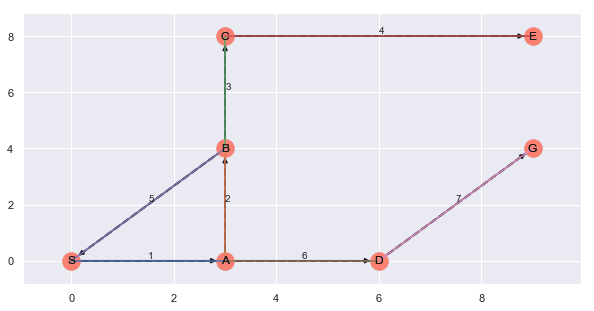

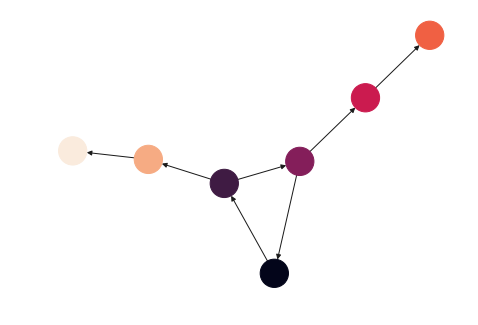

In [14]:
graph = Graph(graph=g, pos=pos)
path, extensions = graph.dfs('S','G')

H = nx.DiGraph()
H.add_nodes_from(path)
H.add_weighted_edges_from(extensions)

plt.figure(figsize=(10,5))
nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k',width=2)
nx.draw_networkx(H,pos,node_color='salmon',width=1.5)
label(extensions, pos)

print('number of extensions:', H.number_of_edges())
print('extensions:',H.edges())

plt.figure()
nx.draw(H, pos=graphviz_layout(H), node_size=800, node_color=range(len(H)), prog='dot')

# Breadth-First Search

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


number of extensions: 10
extensions: [('S', 'A'), ('S', 'B'), ('A', 'B'), ('A', 'D'), ('A', 'S'), ('B', 'A'), ('B', 'C'), ('B', 'S'), ('D', 'A'), ('D', 'G')]


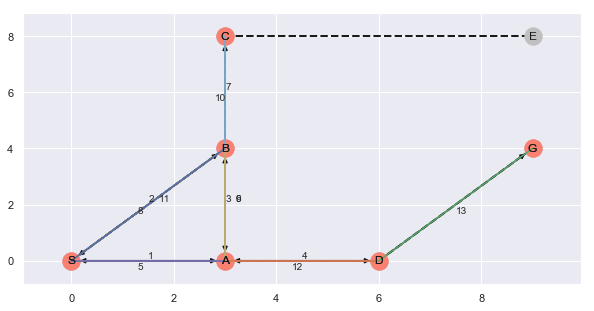

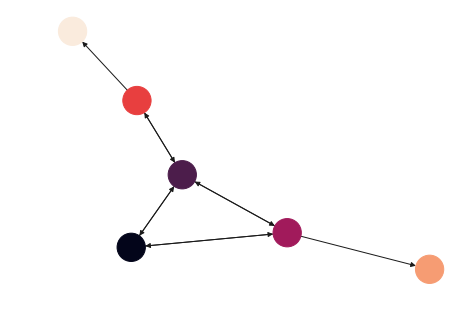

In [15]:
graph = Graph(graph=g, pos=pos)
path, extensions = graph.bfs('S','G')

H = nx.DiGraph()
H.add_nodes_from(path)
H.add_weighted_edges_from(extensions)

plt.figure(figsize=(10,5))
nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k',width=2)
nx.draw_networkx(H,pos,node_color='salmon',width=1.5)
label(extensions, pos)

print('number of extensions:', H.number_of_edges())
print('extensions:',H.edges())

plt.figure()
nx.draw(H, pos=graphviz_layout(H), node_size=800, node_color=range(len(H)), prog='dot')

# Hill Climbing

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


number of extensions: 4
extensions: [('S', 'B'), ('B', 'A'), ('A', 'D'), ('D', 'G')]


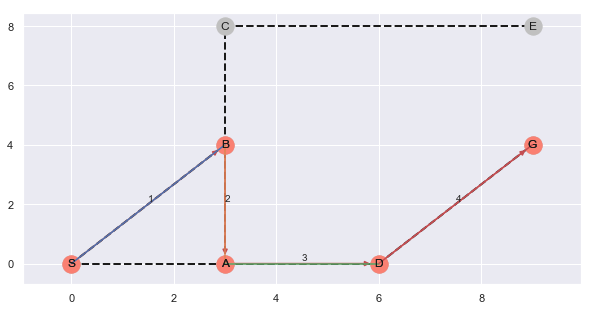

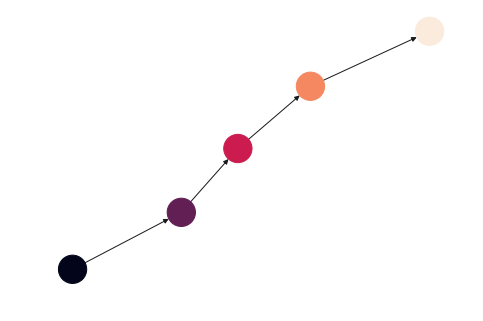

In [16]:
graph = Graph(graph=g, pos=pos)
path, extensions = graph.hill_climb('S','G')

H = nx.DiGraph()
H.add_nodes_from(path)
H.add_weighted_edges_from(extensions)

plt.figure(figsize=(10,5))
nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k',width=2)
nx.draw_networkx(H,pos,node_color='salmon',edge_color='r',width=1.5)
label(extensions, pos)

print('number of extensions:', H.number_of_edges())
print('extensions:',H.edges())

plt.figure()
nx.draw(H, pos=graphviz_layout(H), node_size=800, node_color=range(len(H)), prog='dot')

# Branch and Bound

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


number of extensions: 10
extensions: [('S', 'A'), ('S', 'B'), ('A', 'D'), ('A', 'S'), ('A', 'B'), ('B', 'A'), ('B', 'C'), ('B', 'S'), ('D', 'A'), ('D', 'G')]


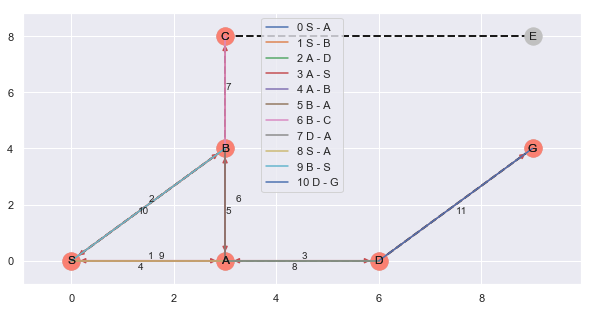

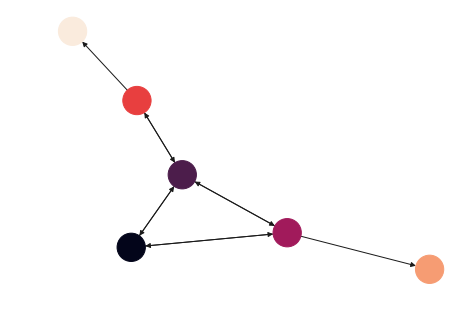

In [17]:
graph = Graph(graph=g, pos=pos)
[path, extensions] = graph.branch_bound('S','G')

H = nx.DiGraph()
H.add_nodes_from(path)
H.add_weighted_edges_from(extensions)

plt.figure(figsize=(10,5))
nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k',width=2)
nx.draw_networkx(H,pos,node_color='salmon',edge_color='r',width=1.5)
label(extensions, pos, legend=True)

print('number of extensions:', H.number_of_edges())
print('extensions:',H.edges())

plt.figure()
nx.draw(H, pos=graphviz_layout(H), node_size=800, node_color=range(len(H)), prog='dot')

# Branch and Bound + Ext. List 

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


number of extensions: 6
extensions: [('S', 'A'), ('S', 'B'), ('A', 'D'), ('A', 'B'), ('B', 'C'), ('D', 'G')]


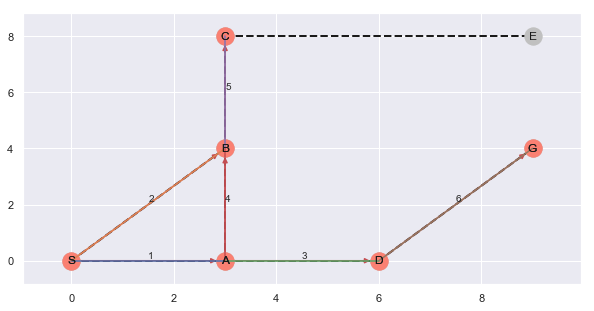

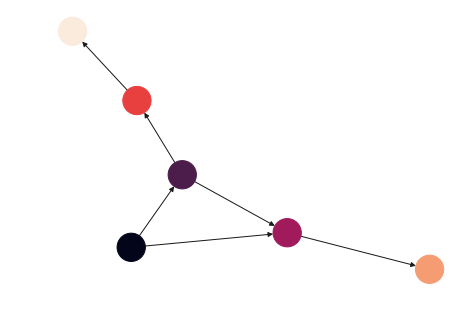

In [18]:
graph = Graph(graph=g, pos=pos)
[path, extensions] = graph.branch_bound_extended('S','G')

H = nx.DiGraph()
H.add_nodes_from(path)
H.add_weighted_edges_from(extensions)

plt.figure(figsize=(10,5))
nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k',width=2)
nx.draw_networkx(H,pos,node_color='salmon',edge_color='r',width=1.5)
label(extensions, pos)

print('number of extensions:', H.number_of_edges())
print('extensions:',H.edges())

plt.figure()
nx.draw(H, pos=graphviz_layout(H), node_size=800, node_color=range(len(H)), prog='dot')

# A*

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


number of extensions: 3
extensions: [('S', 'A'), ('A', 'D'), ('D', 'G')]


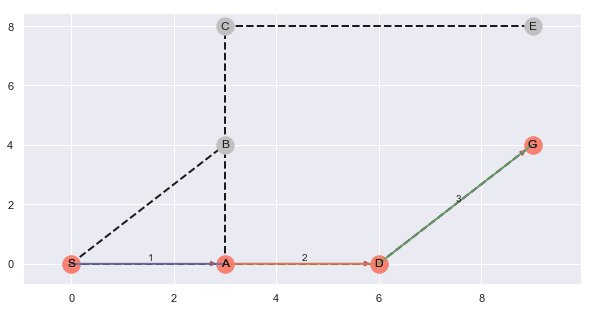

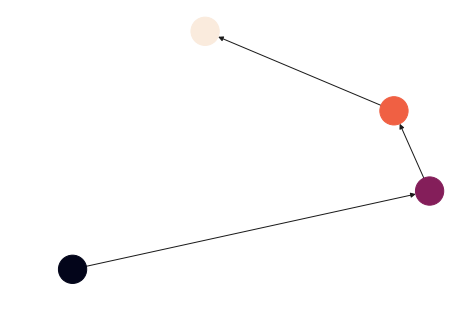

In [19]:
graph = Graph(graph=g, pos=pos)
path, extensions = graph.A('S','G')

H = nx.DiGraph()
H.add_nodes_from(path)
H.add_weighted_edges_from(extensions)

plt.figure(figsize=(10,5))
nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k',width=2)
nx.draw_networkx(H,pos,node_color='salmon',edge_color='r',width=1.5)
label(extensions, pos)

print('number of extensions:', H.number_of_edges())
print('extensions:',H.edges())

plt.figure()
nx.draw(H, pos=graphviz_layout(H), node_size=800, node_color=range(len(H)), prog='dot')

# Plot and Save All

In [20]:
graphs = [[g1,pos1],[g2,pos2],[g3,pos3],[g4,pos4],[g5,pos5]]
algos = ['DFS','BFS','Hill Climb','Branch and Bound', 'Branch and Bound + Ext. List','A*']

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
MovieWriter ffmpeg unavailable. Trying to use pillow instead.
/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
MovieWriter ffmpeg unavailable. Trying to use pillow instead.
/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
MovieWriter ffmpeg unavailable. Trying to use pillow instead.
/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
MovieWriter ffmpeg unavailable. Trying to use pillow instead.
/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`m

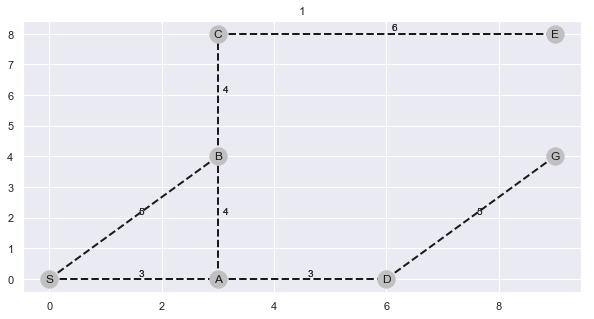

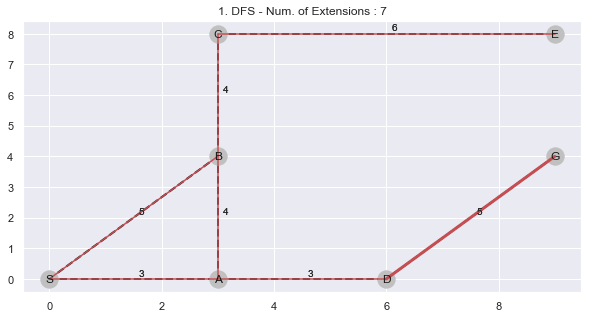

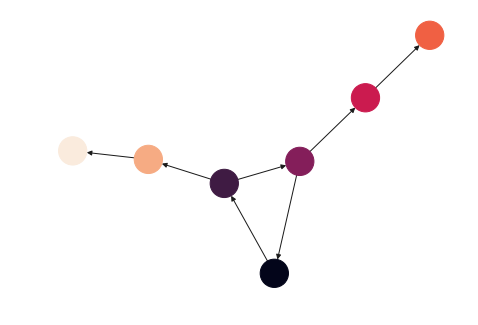

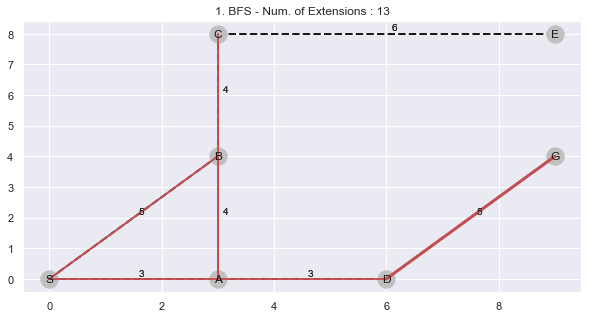

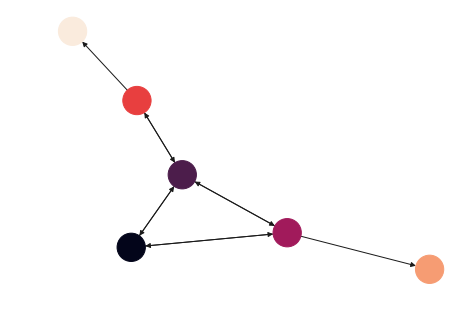

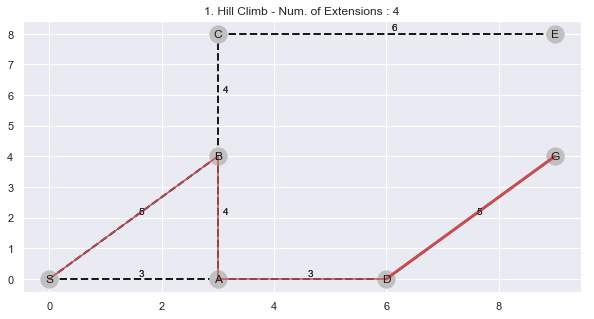

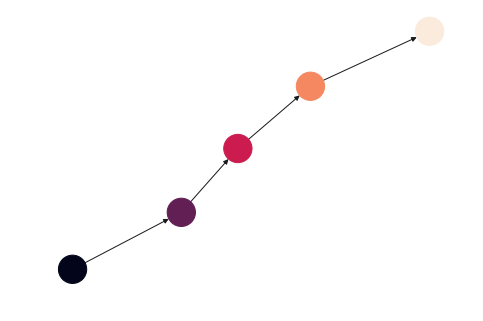

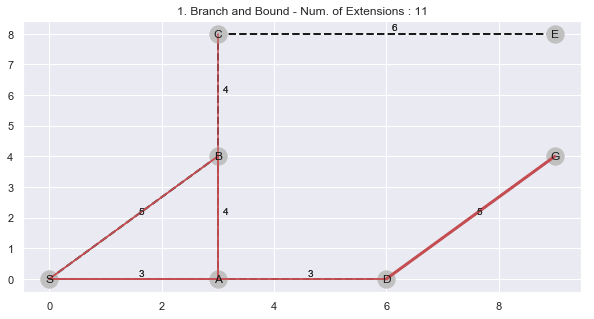

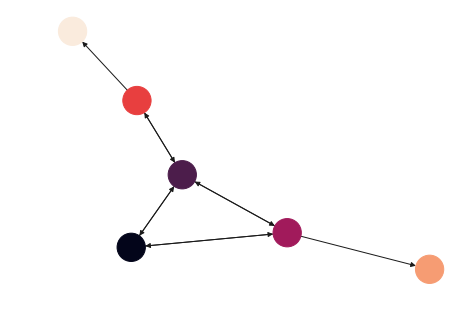

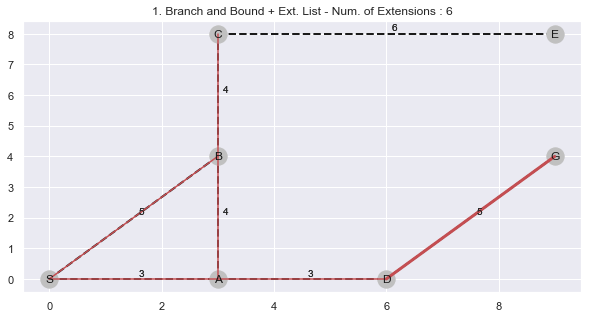

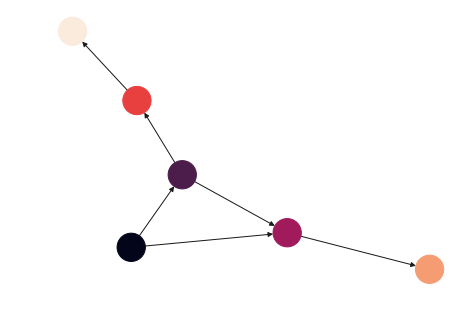

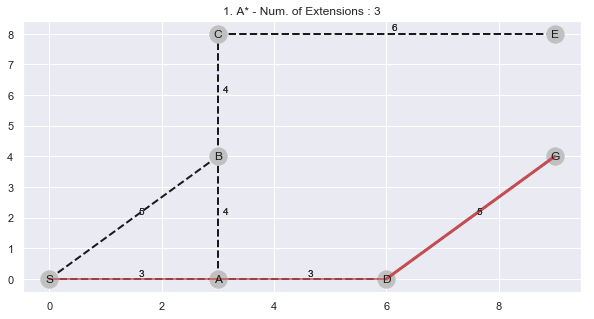

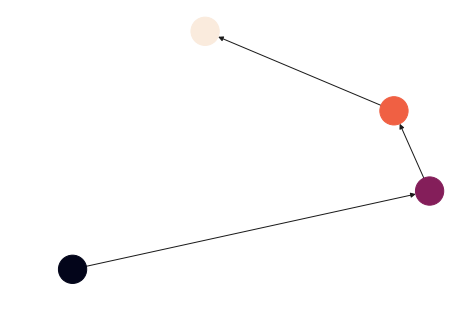

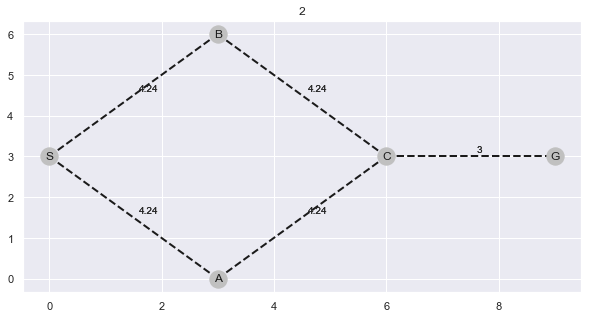

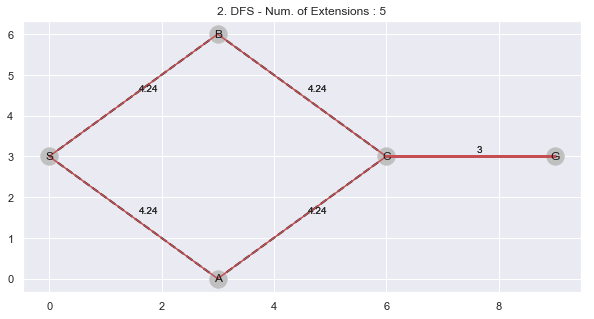

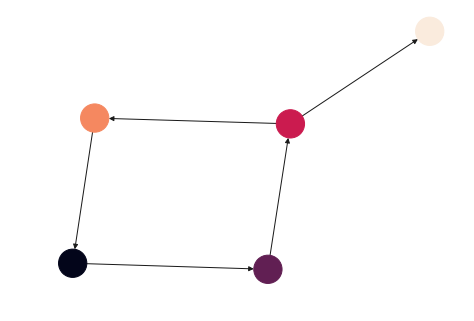

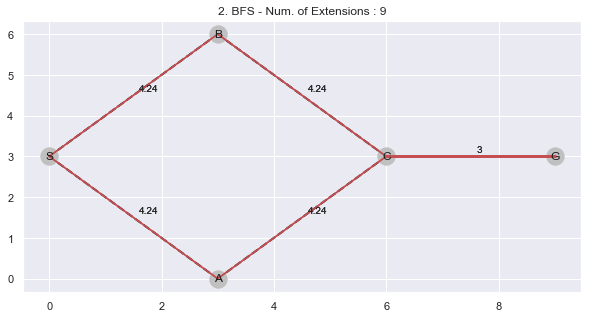

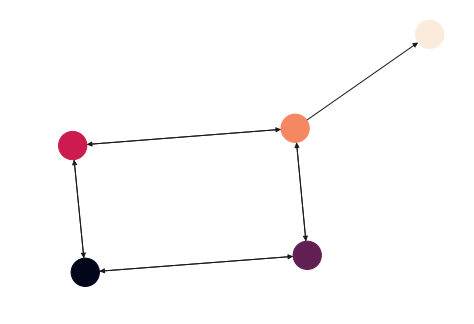

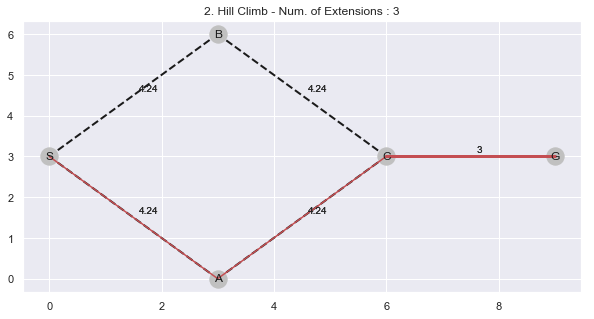

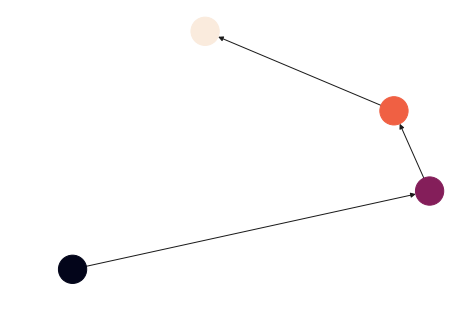

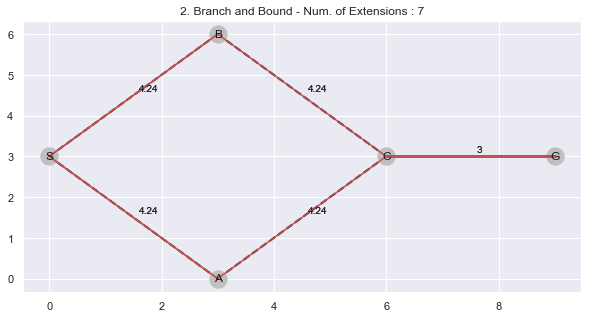

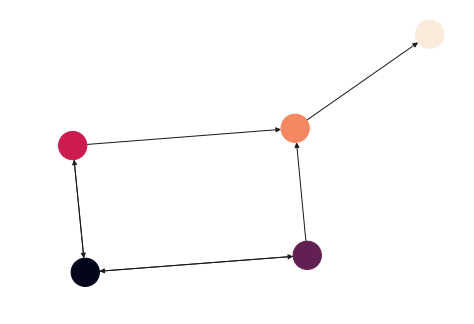

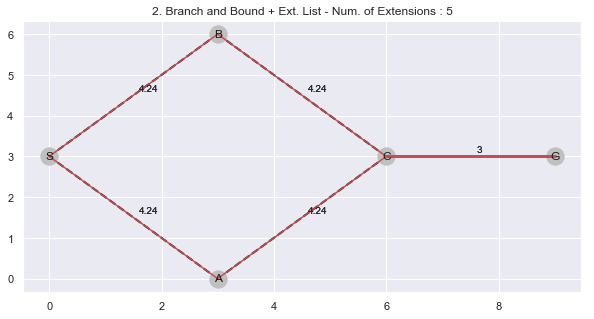

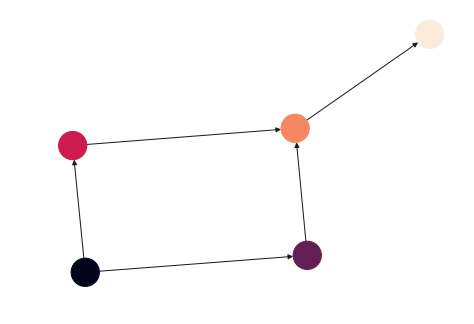

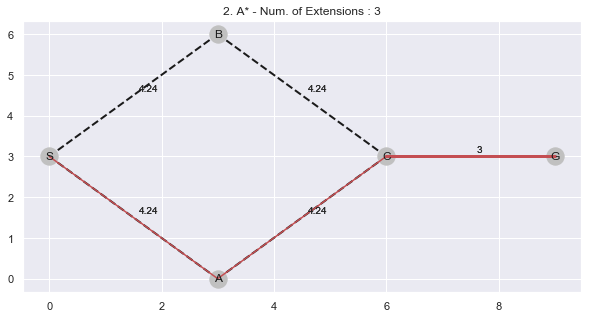

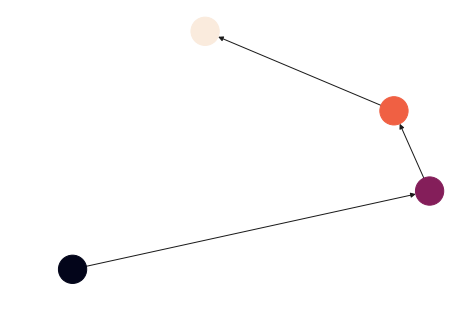

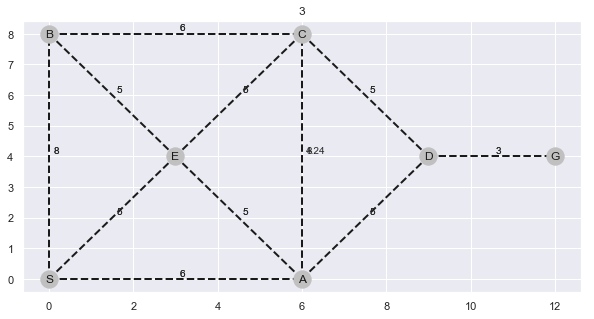

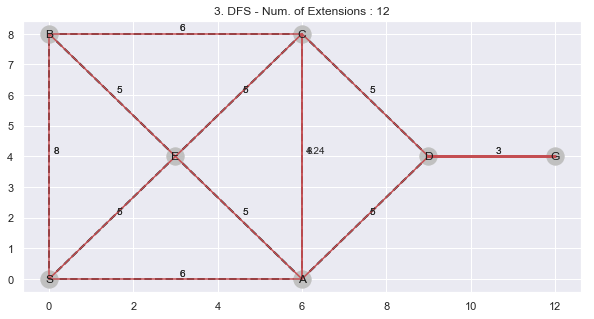

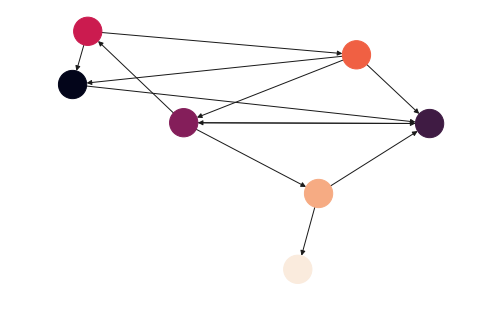

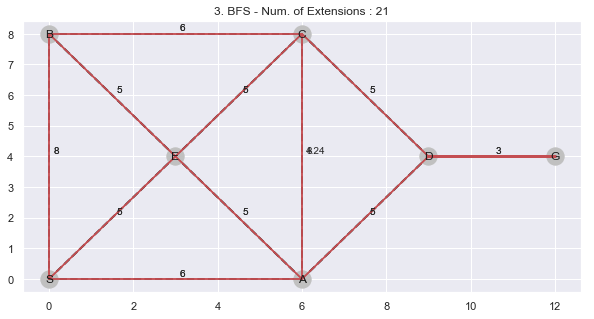

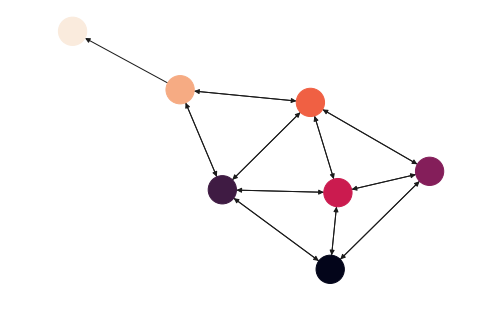

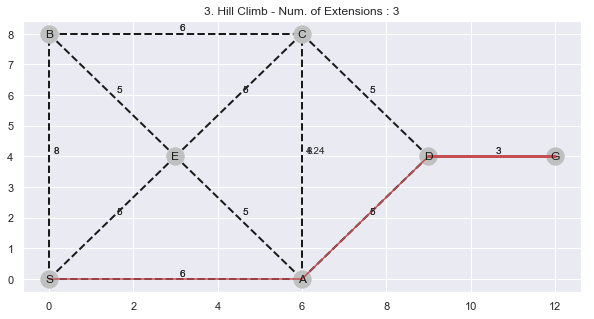

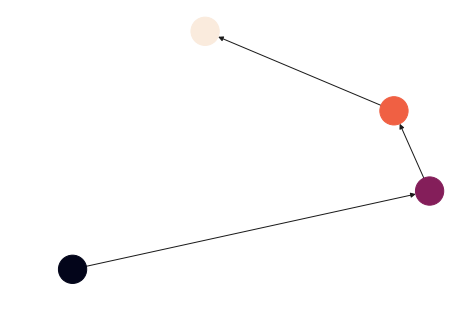

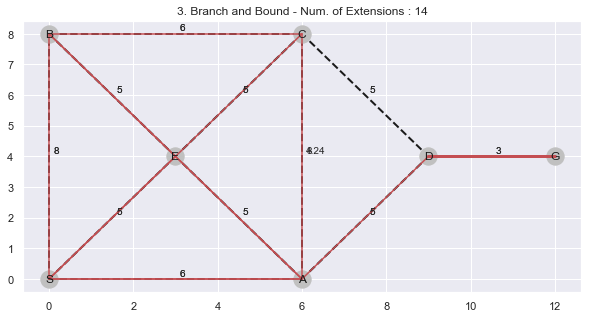

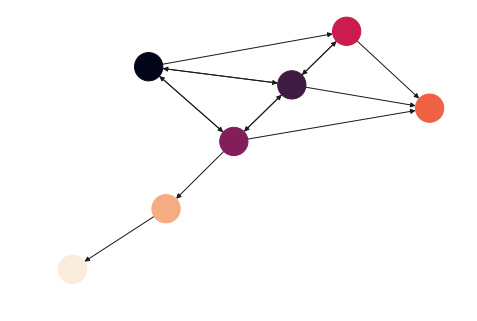

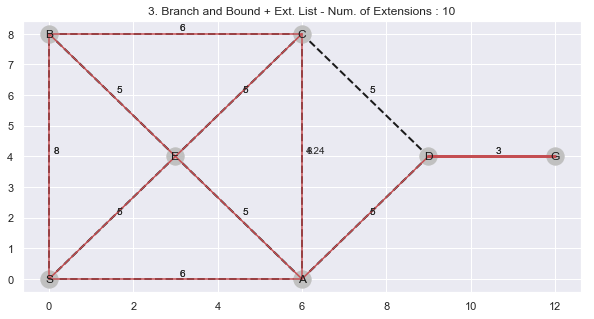

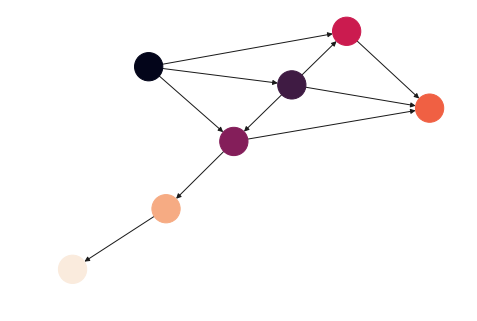

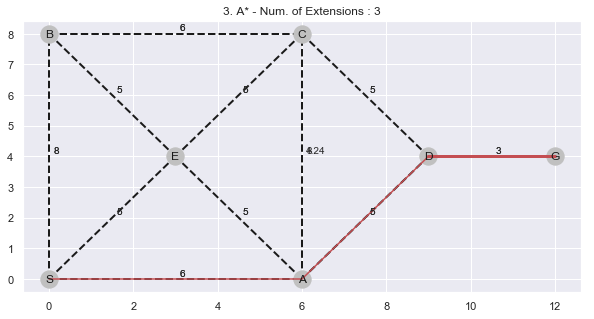

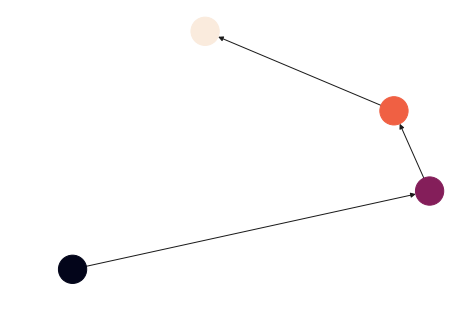

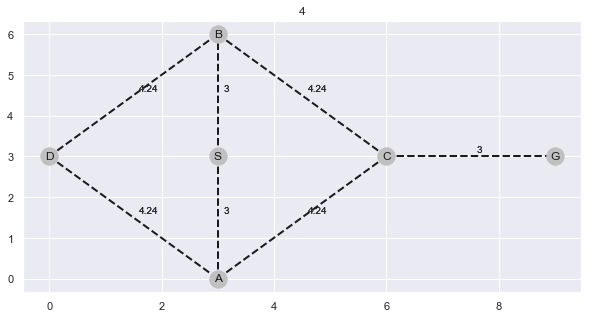

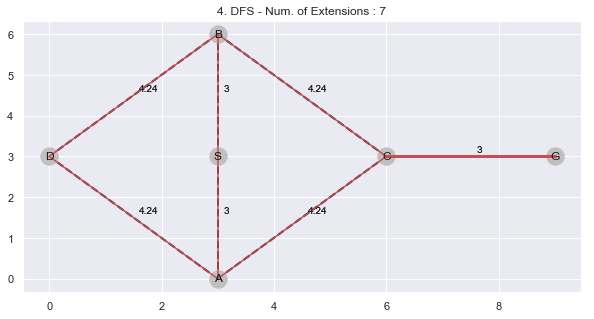

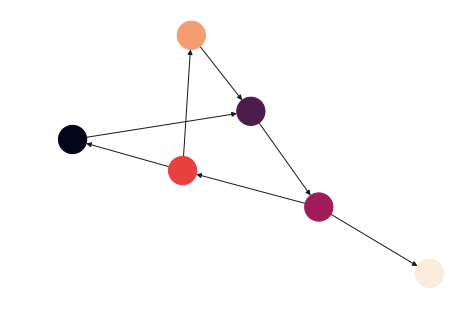

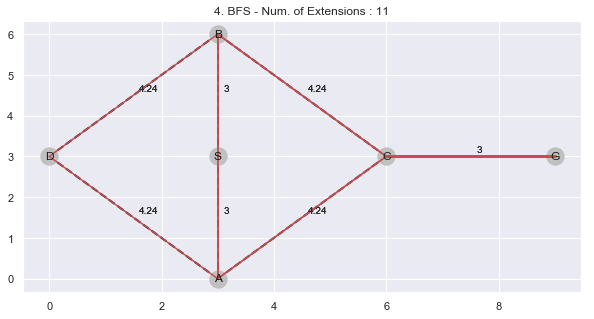

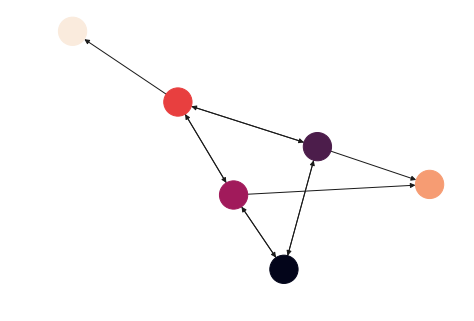

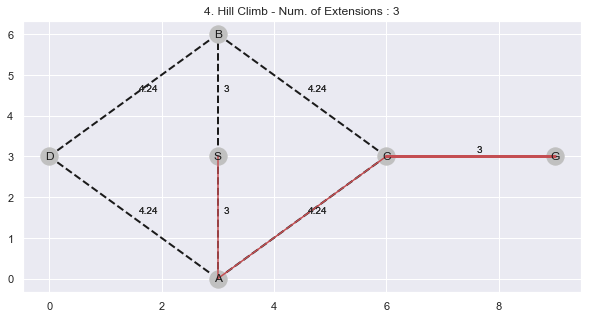

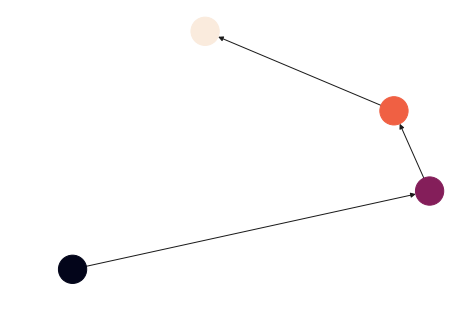

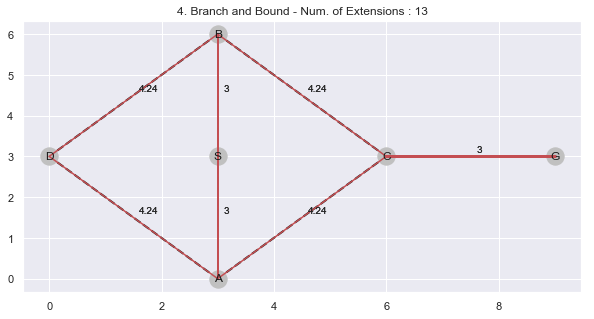

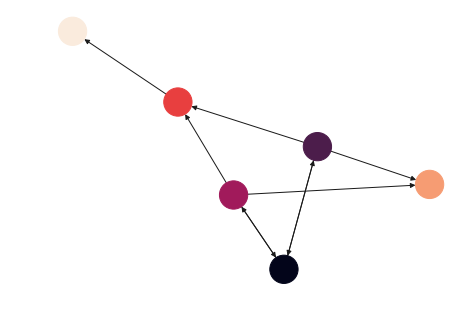

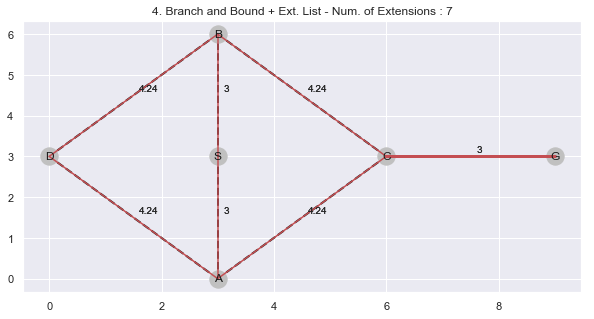

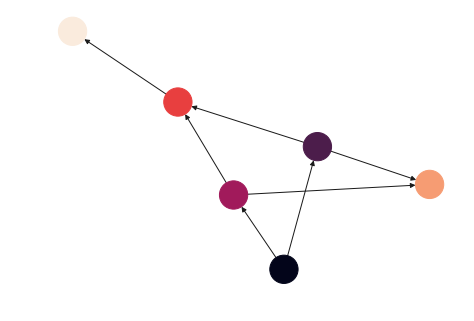

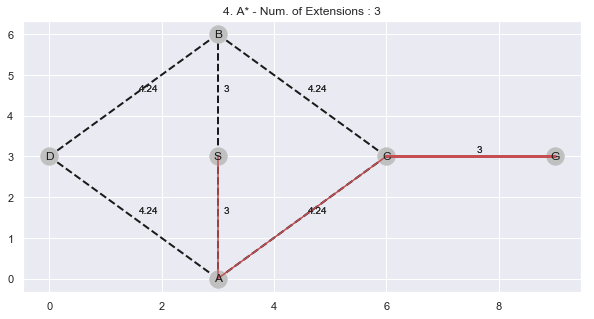

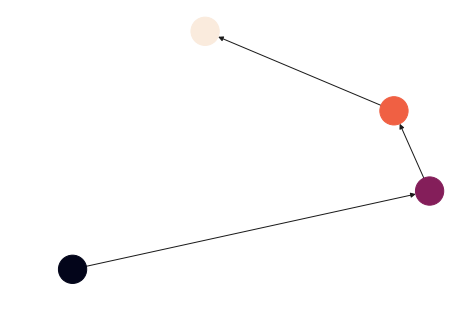

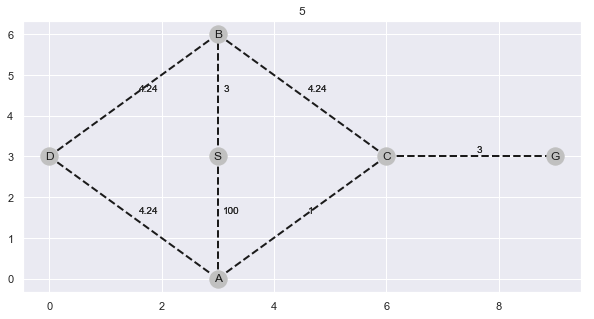

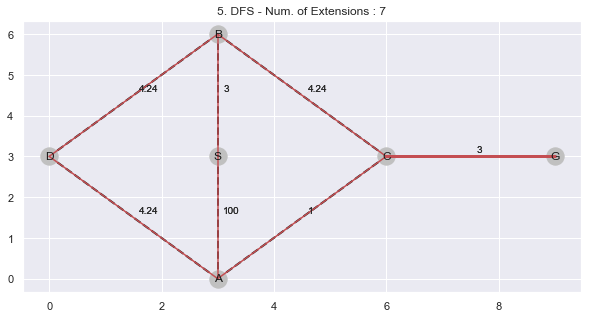

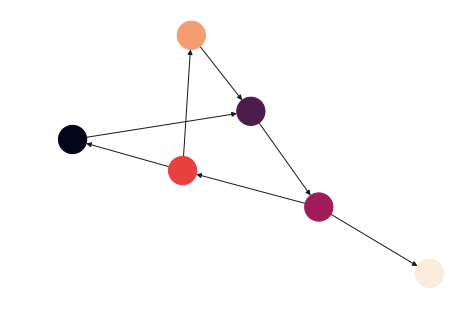

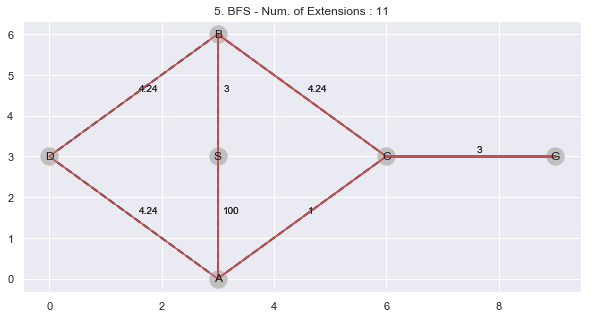

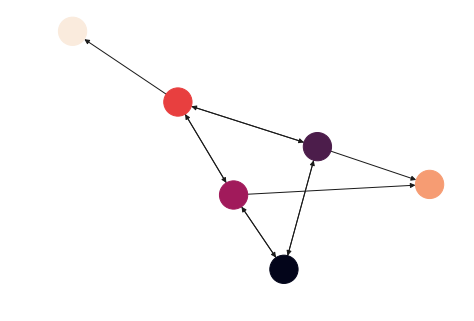

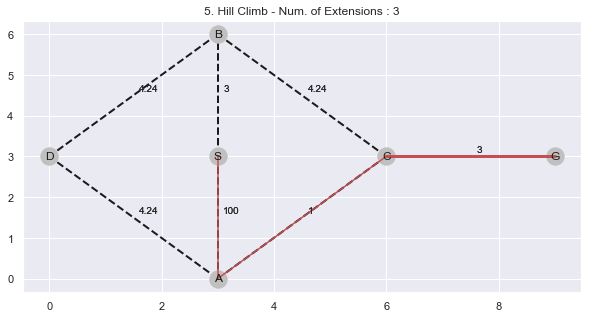

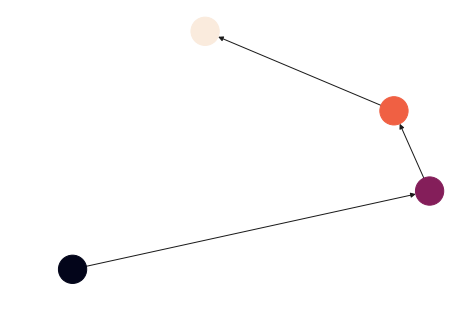

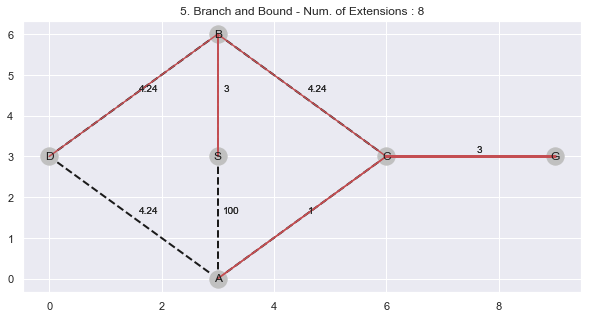

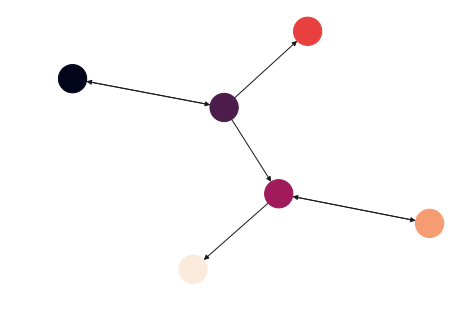

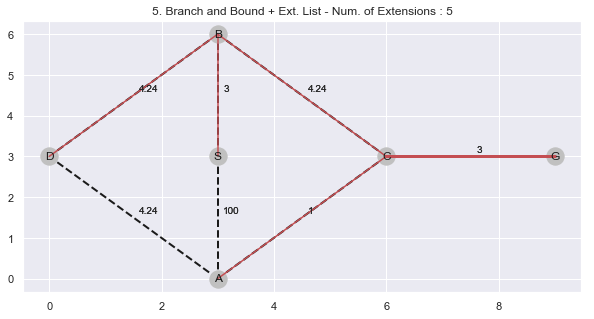

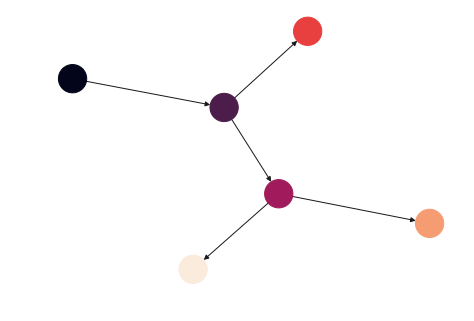

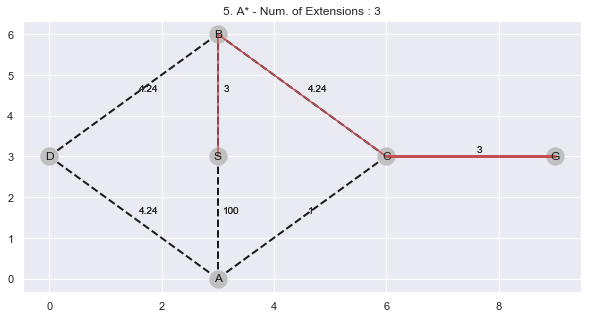

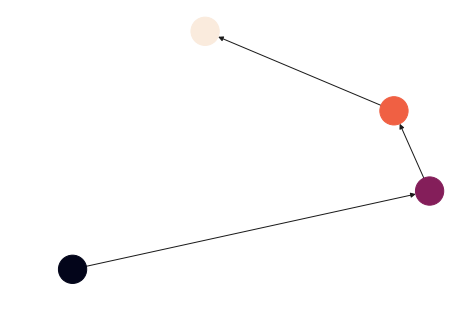

In [21]:
for i,temp in enumerate(graphs):
    g,pos = temp
    graph = Graph(graph=g, pos=pos)

    G = nx.Graph()
    G.add_nodes_from(graph.nodes())
    G.add_weighted_edges_from(graph.edges())
    
    plt.figure(figsize=(10,5))
    nx.draw_networkx(G,pos,edge_labels=labels,node_color='silver',style='dashed',edge_color='k',width=2)
    plt.title(i+1)
    
    for path in graph.edges():
        p1,p2 = pos[path[0]],pos[path[1]]
        x = [p1[0],p2[0]]
        y = [p1[1],p2[1]]
        
        plt.text(0.1+sum(x)/2,0.1+sum(y)/2,round(path[2],2))
        
    plt.savefig('Graphs/{}'.format(i+1))
    
    for algo in algos:
        
        if algo == 'DFS':
            path, extensions = graph.dfs('S','G')
        elif algo == 'BFS':
            path, extensions = graph.bfs('S','G')
        elif algo == 'Hill Climb':
            path, extensions = graph.hill_climb('S','G')
        elif algo == 'Branch and Bound':
            path, extensions = graph.branch_bound('S','G')
        elif algo == 'Branch and Bound + Ext. List':
            path, extensions = graph.branch_bound_extended('S','G')
        elif algo == 'A*':
            path, extensions = graph.A('S','G')
         
        H = nx.DiGraph()
        H.add_nodes_from(path)
        H.add_weighted_edges_from(extensions)

        fig = plt.figure(figsize=(10,5))
        nx.draw_networkx(G,pos,node_color='silver',style='dashed',edge_color='k',width=2)
        for path in graph.edges():
            p1,p2 = pos[path[0]],pos[path[1]]
            x = [p1[0],p2[0]]
            y = [p1[1],p2[1]]

            plt.text(0.1+sum(x)/2,0.1+sum(y)/2,str(round(path[2],2)))
        
        line, = plt.plot([], [], lw=3)
        title = '{}. '.format(i+1) + algo + ' - Num. of Extensions : ' + str(len(extensions))
        plt.title(title)
        
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(extensions), interval=20, blit=True)
        anim.save('Graphs/map{}_{}.gif'.format(i+1,algo), fps=2)
        
        plt.figure()
        nx.draw(H, pos=graphviz_layout(H), node_size=800, node_color=range(len(H)), prog='dot')
        plt.savefig('Graphs/map{}_{}.jpg'.format(i+1,algo))
